# Libraries to explore the data

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import pylab 
pylab.rcParams['figure.figsize'] = 12, 8

% matplotlib inline 

# Loading the three tables

In [200]:
driver_ids_df = pd.read_csv('/Users/Hedi/Documents/driver_ids.csv')
ride_ids_df = pd.read_csv('/Users/Hedi/Documents/ride_ids.csv')
ride_timestamp_df = pd.read_csv('/Users/Hedi/Documents/ride_timestamps.csv')

In [201]:
pd.set_option('display.max_rows', 5000)

## -------------------------------------------------------------------------------------------

# Table of content:
# Part A:  Overview of the three tables
# Part B: Joining the tables
# Part C: Exploratory data analysis
# Part D: Driver Value
# Part E: Driver Lifetime

## -------------------------------------------------------------------------------------------

# Part A

# Driver id Table

### 1) General Informations about the Driver_id table
### 2) Some Insights

### -------------------------------------------------

#### 1) General Informations

In [202]:
driver_ids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null object
dtypes: object(2)
memory usage: 14.7+ KB


In [203]:
driver_ids_df.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


#### 2) Insights

#### 937 drivers have an onboard date
#### The driver onboard date varies between: '2016-03-28 00:00:00' and '2016-05-15 00:00:00'

In [204]:
driver_ids_df['driver_onboard_date'].min()

'2016-03-28 00:00:00'

In [205]:
driver_ids_df['driver_onboard_date'].max()

'2016-05-15 00:00:00'

### ---------------------------------------------

# Ride id Dataframe

### 1) General Informations about the Ride_id table
### 2) Some Insights

### -------------------------------------------------

#### 1) General Informations

In [206]:
ride_ids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
driver_id          193502 non-null object
ride_id            193502 non-null object
ride_distance      193502 non-null int64
ride_duration      193502 non-null int64
ride_prime_time    193502 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [207]:
ride_ids_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


#### 2) Insights

     There are 193502 rides.
     There are 937 drivers. However, at this point we don't know if they're the same 
     than the ones in Driver_id  table
     To get that information, one would need to join those two tables

In [208]:
ride_ids_df['driver_id'].nunique()

937

### ---------------------------------------------------------------------------------------------------------

# Ride_timestamp Dataframe

### 1) General Informations about the Ride_id table
### 2) Some Insights

### -------------------------------------------------

#### 1) General information

In [209]:
ride_timestamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null object
dtypes: object(3)
memory usage: 22.2+ MB


In [210]:
ride_timestamp_df.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


#### 2) Insights

#### First, there is 1 NULL value in the column timestamp which needs to be removed

In [211]:
ride_timestamp_df[ride_timestamp_df['timestamp'].isnull()]

,ride_id,event,timestamp
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaN


In [212]:
ride_timestamp_df[ride_timestamp_df['ride_id']=='72f0fa0bd86800e9da5c4dced32c8735']

,ride_id,event,timestamp
434220,72f0fa0bd86800e9da5c4dced32c8735,requested_at,2016-04-20 11:56:50
434221,72f0fa0bd86800e9da5c4dced32c8735,accepted_at,2016-04-20 11:57:20
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaN
434223,72f0fa0bd86800e9da5c4dced32c8735,picked_up_at,2016-04-20 12:02:20
434224,72f0fa0bd86800e9da5c4dced32c8735,dropped_off_at,2016-04-20 12:16:30


In [213]:
ride_timestamp_df.drop(ride_timestamp_df.index[[434220,434221,434222,434223,434224]],inplace=True)

#### Second, the ride time range varies between: '2016-03-28 05:48:18' and '2016-06-27 00:50:50'
#### To avoid seasonality effects, we'll consider 3 periods of 28 days

In [214]:
ride_timestamp_df['timestamp'].min()

'2016-03-28 05:48:18'

In [215]:
ride_timestamp_df['timestamp'].max()

'2016-06-27 00:50:50'

### -----------------------------------------------------------------------------------------------------

# PART B

## Join the Driver_id and the Ride_id tables

#### An outer join is used cause one of the hypothesis is:
     
     83 drivers joined LYFT (have an onboard date) but didn't complete any ride.
     Those drivers are kept in the dataframe cause they will impact the distribution
     of the number of rides per driver
     
     Also, there are 83 drivers that don't have an onboard date 
     --> Need to be removed cause the onboard date is crucial
     to compute the number of rides per driver daily
     --> Removing 8% of the drivers shouldn't impact the average driver behavior trend

In [216]:
combined_df_driver_id_ride_id = pd.merge(driver_ids_df,ride_ids_df,how='outer',on='driver_id')

In [217]:
combined_df_driver_id_ride_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193585 entries, 0 to 193584
Data columns (total 6 columns):
driver_id              193585 non-null object
driver_onboard_date    185974 non-null object
ride_id                193502 non-null object
ride_distance          193502 non-null float64
ride_duration          193502 non-null float64
ride_prime_time        193502 non-null float64
dtypes: float64(3), object(3)
memory usage: 10.3+ MB


In [218]:
# When joining the driver_id to the ride_id table
# the number of unique drivers increased to 1,020
# because there are 83 drivers that don't have a onboard date

combined_df_driver_id_ride_id['driver_id'].nunique()

1020

In [219]:
# There are 83 drivers (8%) that don't have an onboard date but are completing rides. 
# Those are removed
combined_df_driver_id_ride_id[combined_df_driver_id_ride_id['driver_onboard_date'].isnull()]['driver_id'].nunique()

83

In [220]:
# Those are removed using a mask
combined_df_driver_id_ride_id = combined_df_driver_id_ride_id[combined_df_driver_id_ride_id['driver_onboard_date'].notnull()]

In [221]:
# There are 83 drivers that have an onboard date BUT didn't complete any ride
# Those are kept in the dataframe
combined_df_driver_id_ride_id[combined_df_driver_id_ride_id['ride_id'].isnull()]['driver_id'].nunique()

83

In [222]:
combined_df_driver_id_ride_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185974 entries, 0 to 185973
Data columns (total 6 columns):
driver_id              185974 non-null object
driver_onboard_date    185974 non-null object
ride_id                185891 non-null object
ride_distance          185891 non-null float64
ride_duration          185891 non-null float64
ride_prime_time        185891 non-null float64
dtypes: float64(3), object(3)
memory usage: 9.9+ MB


In [223]:
combined_df_driver_id_ride_id.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,01b522c5c3a756fbdb12e95e87507eda,3362.0,809.0,0.0
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,029227c4c2971ce69ff2274dc798ef43,3282.0,572.0,0.0
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,034e861343a63ac3c18a9ceb1ce0ac69,65283.0,3338.0,25.0
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,034f2e614a2f9fc7f1c2f77647d1b981,4115.0,823.0,100.0


## Join the Combined Driver_id/Ride_id table to the Ride_timestamp 


#### An outer join is used cause one of the hypothesis is:
    
    1683 rides (0.8%) don't have an associated timestamp
    --> Those rides need to be remove

In [224]:
combined_df_driver_id_ride_id_ride_timestamp = pd.merge(combined_df_driver_id_ride_id,ride_timestamp_df,how='outer',on='ride_id')

In [225]:
combined_df_driver_id_ride_id_ride_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972166 entries, 0 to 972165
Data columns (total 8 columns):
driver_id              922806 non-null object
driver_onboard_date    922806 non-null object
ride_id                972083 non-null object
ride_distance          922723 non-null float64
ride_duration          922723 non-null float64
ride_prime_time        922723 non-null float64
event                  970400 non-null object
timestamp              970400 non-null object
dtypes: float64(3), object(5)
memory usage: 66.8+ MB


In [226]:
# It's important to observe that the number of unique rides 
# is higher than the one obtained with the Ride_id table 194,080
# There are rides from ride_id that don't have a timestamp
# those are removed using a mask

combined_df_driver_id_ride_id_ride_timestamp['ride_id'].nunique()

195763

In [227]:
# The existing rides with no associated timestamp (1683 represents 0.8%) have to be removed
# It's important to mention that the drivers that didn't complete any rides
# are kept in the dataframe

combined_df_driver_id_ride_id_ride_timestamp[combined_df_driver_id_ride_id_ride_timestamp['timestamp'].isnull() & 
                                             combined_df_driver_id_ride_id_ride_timestamp['ride_id'].notnull()]['ride_id'].nunique()

1683

In [228]:
# A mask is used to only keep the rides that have associated timestamp OR the 
# case when the drivers didn't complete any rides

combined_df_driver_id_ride_id_ride_timestamp = combined_df_driver_id_ride_id_ride_timestamp[((combined_df_driver_id_ride_id_ride_timestamp['ride_id'].isnull()) 
                                                                                       & (combined_df_driver_id_ride_id_ride_timestamp['timestamp'].isnull())) | 
                                                                                      (( combined_df_driver_id_ride_id_ride_timestamp['ride_id'].notnull()) & 
                                                                                       (combined_df_driver_id_ride_id_ride_timestamp['timestamp'].notnull()))]

In [229]:
combined_df_driver_id_ride_id_ride_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970483 entries, 0 to 972165
Data columns (total 8 columns):
driver_id              921123 non-null object
driver_onboard_date    921123 non-null object
ride_id                970400 non-null object
ride_distance          921040 non-null float64
ride_duration          921040 non-null float64
ride_prime_time        921040 non-null float64
event                  970400 non-null object
timestamp              970400 non-null object
dtypes: float64(3), object(5)
memory usage: 66.6+ MB


## -------------------------------------------------------------------------

#### Conversion:
    meter to mile: 1 meter = 0.000621371 mile
    second to minute: Assumption: every minute is rounded to the lower bound

In [230]:
combined_df_driver_id_ride_id_ride_timestamp['ride_duration_minutes']=combined_df_driver_id_ride_id_ride_timestamp['ride_duration'].map(lambda x: int(x/60) if not math.isnan(x) else x )
combined_df_driver_id_ride_id_ride_timestamp['ride_distance_miles']=combined_df_driver_id_ride_id_ride_timestamp['ride_distance']*0.000621371
combined_df_driver_id_ride_id_ride_timestamp.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,ride_duration_minutes,ride_distance_miles
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,requested_at,2016-04-23 02:13:50,5.0,1.125303
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,accepted_at,2016-04-23 02:14:15,5.0,1.125303
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,arrived_at,2016-04-23 02:16:36,5.0,1.125303
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,picked_up_at,2016-04-23 02:16:40,5.0,1.125303
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,dropped_off_at,2016-04-23 02:22:07,5.0,1.125303


In [231]:
# Function to compute the ride price

def compute_ride_price(distance_miles, duration_minute, prime):
    price = 2+1.75+distance_miles*1.15+duration_minute*0.22
    price = price *((100+prime)/100.0)
    price.loc[price>400]=400
    price.loc[price<5]=5
    return price

In [232]:
combined_df_driver_id_ride_id_ride_timestamp['total_revenue_$'] = compute_ride_price(
                                                                                    combined_df_driver_id_ride_id_ride_timestamp['ride_distance_miles'], 
                                                                                    combined_df_driver_id_ride_id_ride_timestamp['ride_distance_miles'], 
                                                                                    combined_df_driver_id_ride_id_ride_timestamp['ride_prime_time']
                                                                                    )
combined_df_driver_id_ride_id_ride_timestamp.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,ride_duration_minutes,ride_distance_miles,total_revenue_$
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,requested_at,2016-04-23 02:13:50,5.0,1.125303,7.937497
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,accepted_at,2016-04-23 02:14:15,5.0,1.125303,7.937497
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,arrived_at,2016-04-23 02:16:36,5.0,1.125303,7.937497
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,picked_up_at,2016-04-23 02:16:40,5.0,1.125303,7.937497
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,dropped_off_at,2016-04-23 02:22:07,5.0,1.125303,7.937497


In [233]:
# Rides contain information per ride_id
# Because there are 83 drivers that didn't complete 
# any rides, rides will not take them into account (group by ignores nan values)

rides = combined_df_driver_id_ride_id_ride_timestamp.groupby('ride_id', as_index=False).agg({
                                                                    'driver_id': lambda x : x.iloc[0],
                                                                    'driver_onboard_date': lambda x: x.iloc[0],
                                                                    'ride_distance': lambda x: x.iloc[0],
                                                                    'ride_duration' : lambda x: x.iloc[0],
                                                                    'ride_prime_time': lambda x: x.iloc[0],
                                                                    'timestamp': lambda x: x.iloc[0],
                                                                    'ride_duration_minutes': lambda x: x.iloc[0],
                                                                    'ride_distance_miles': lambda x: x.iloc[0],
                                                                    'total_revenue_$': lambda x: x.iloc[0],  
                                                                    })


# -----------------------------------------------------------------------

In [234]:
# Drivers contain information per driver
# drivers doesn t contain the 83 drivers because it 
# uses a group by on rides

drivers = rides.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': lambda x: x.sum(),
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds'          
                                                })
drivers.head()

,driver_id,#_rides,driver_onboard_date,last_date,total_duration_seconds,total_revenue_$,total_distance_miles
0,002be0ffdc997bd5c50703158b7c2491,277,2016-03-29,2016-06-23 10:06:26,221238.0,2972.865269,1081.363873
1,007f0389f9c7b03ef97098422f902e62,31,2016-03-29,2016-06-22 13:17:40,20497.0,259.342110,73.030355
2,011e5c5dfc5c2c92501b8b24d47509bc,34,2016-04-05,2016-06-12 20:22:22,29205.0,409.640711,167.554554
3,0152a2f305e71d26cc964f8d4411add9,191,2016-04-23,2016-06-26 10:16:37,174521.0,2156.859654,914.185249
4,01674381af7edd264113d4e6ed55ecda,375,2016-04-29,2016-06-24 13:03:37,357443.0,4472.513069,1940.941796


In [235]:
# Those are the drivers who joined Lyft but never completed a ride

inexistant_rides = combined_df_driver_id_ride_id_ride_timestamp.loc[combined_df_driver_id_ride_id_ride_timestamp['ride_id'].isnull()]
never_activated_drivers = inexistant_rides.groupby('driver_id', as_index=False).agg({
                                                            'ride_id': lambda x: x.count(),
                                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                                            'total_revenue_$': lambda x: 0,
                                                            'ride_distance_miles': lambda x: 0,
                                                            'ride_duration': lambda x: 0,
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds'          
                                                })

never_activated_drivers['last_date']=never_activated_drivers['driver_onboard_date']

In [236]:
# We add those 81 drivers to the driver table 

drivers = pd.concat([drivers, never_activated_drivers])

In [237]:
drivers['total_#_days']=(drivers['last_date']-drivers['driver_onboard_date']+timedelta(days=1)).dt.days
drivers['rides_per_day'] =drivers['#_rides']/drivers['total_#_days']
drivers['rides_per_day'].loc[drivers['rides_per_day'].isnull()]=0

In [238]:
drivers.head()

,#_rides,driver_id,driver_onboard_date,last_date,total_distance_miles,total_duration_seconds,total_revenue_$,total_#_days,rides_per_day
0,277,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23 10:06:26,1081.363873,221238.0,2972.865269,87,3.183908
1,31,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22 13:17:40,73.030355,20497.0,259.342110,86,0.360465
2,34,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12 20:22:22,167.554554,29205.0,409.640711,69,0.492754
3,191,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26 10:16:37,914.185249,174521.0,2156.859654,65,2.938462
4,375,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24 13:03:37,1940.941796,357443.0,4472.513069,57,6.578947


# --------------------------------------------------------------

# Part C: Exploratory Data Analysis

## Few insights can be highlighted from the dataset exploration:

    1)The driver behavior varies SIGNIFICANTLY across drivers.
      The number of rides per drivers is a perfect example.
    
    2) The average retention per driver is highly corrolated to the revenue of the driver
       during the previous month.

#### 1st insight

In [239]:
drivers.describe()

,#_rides,total_distance_miles,total_duration_seconds,total_revenue_$,total_#_days,rides_per_day
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,200.226087,864.086193,172168.875000,2251.197105,51.106522,3.501432
std,181.276255,794.781899,156587.105895,2042.706452,26.047365,2.861186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,39.000000,161.559412,32529.000000,423.181004,34.000000,0.968750
50%,205.000000,786.530790,171141.500000,2183.098253,56.000000,3.180639
75%,318.000000,1365.818041,271704.750000,3587.052519,72.000000,5.268012
max,919.000000,4118.571884,779797.000000,10413.867070,91.000000,17.500000


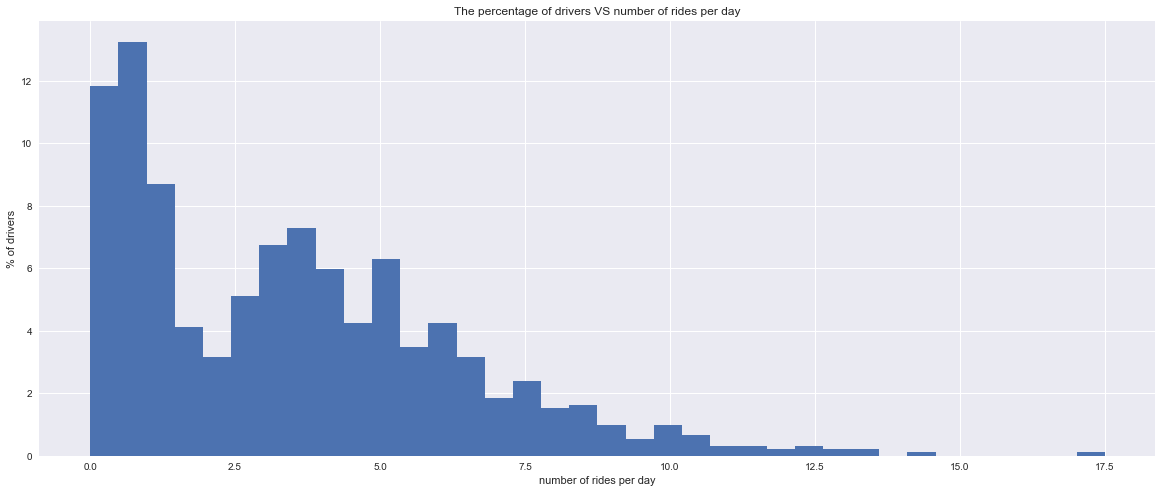

In [267]:
ndrivers = len(drivers['driver_id'])
drivers.hist(column='rides_per_day', bins=36, figsize=(20,8), weights=np.ones(ndrivers)*100.0/ndrivers)
plt.xlabel("number of rides per day")
plt.ylabel("% of drivers")
plt.title("The percentage of drivers VS number of rides per day")
plt.savefig('#_rides_day.png')
plt.show()


In [241]:
#drivers.sort_values('rides_per_day', ascending = False)

#### 2ND insight: 

In [242]:
# Here, we need at least 56 days of data to 
# correlate churn with revenue in the first 28 days
# Churner: driver who didn t complete any ride during 28 days

rides_at_least_56_days_data = rides[pd.to_datetime(rides['driver_onboard_date']) <= 
                                    pd.to_datetime('2016-05-02 00:00:00') ]

In [243]:
# All the rides during the first 28 periods

rides_first_28_period = rides_at_least_56_days_data[(pd.to_datetime(rides_at_least_56_days_data['timestamp']) <
                                                    pd.to_datetime(rides_at_least_56_days_data['driver_onboard_date']) + timedelta(days=28))]
rides_first_28_period.head()

,ride_id,driver_id,ride_duration,ride_distance,driver_onboard_date,ride_distance_miles,timestamp,ride_duration_minutes,ride_prime_time,total_revenue_$
1,00005eae40882760d675da5effb89ae3,0656192a402808805282e60761bda088,479.0,3016.0,2016-04-30 00:00:00,1.874055,2016-05-14 05:23:21,7.0,25.0,7.896819
10,000290b418595bfe228d2bf4d4e331df,4aa585f63fbe04dcded4019662cc47f8,852.0,3019.0,2016-04-17 00:00:00,1.875919,2016-04-30 23:30:19,14.0,0.0,6.320009
16,0003bd8128cced32fcb88aa3805b0a72,8dc9d28aa6ab0af5dcc98420a9bd65e0,1291.0,6970.0,2016-04-23 00:00:00,4.330956,2016-04-26 21:21:21,21.0,25.0,12.104262
18,00046fb60349e54c9845d667d7c897fd,39a7bc235caf53556b15dd28ab5a7157,490.0,2314.0,2016-05-02 00:00:00,1.437852,2016-05-08 01:59:20,8.0,100.0,11.439716
22,000527ec3aa73cc922d8a4858edf9c06,a6fe0a06612bc9d9fd3f7dc1fd9615f0,527.0,5796.0,2016-04-11 00:00:00,3.601466,2016-04-13 22:55:05,8.0,0.0,8.684009


In [244]:
rides_second_28_period = rides_at_least_56_days_data[(pd.to_datetime(rides_at_least_56_days_data['timestamp']) >=
                                                      pd.to_datetime(rides_at_least_56_days_data['driver_onboard_date']) + timedelta(days=28))&
                                                     (pd.to_datetime(rides_at_least_56_days_data['timestamp']) <
                                                      pd.to_datetime(rides_at_least_56_days_data['driver_onboard_date']) + timedelta(days=56))]
                                                      
                                                      
rides_first_28_period.head()     

,ride_id,driver_id,ride_duration,ride_distance,driver_onboard_date,ride_distance_miles,timestamp,ride_duration_minutes,ride_prime_time,total_revenue_$
1,00005eae40882760d675da5effb89ae3,0656192a402808805282e60761bda088,479.0,3016.0,2016-04-30 00:00:00,1.874055,2016-05-14 05:23:21,7.0,25.0,7.896819
10,000290b418595bfe228d2bf4d4e331df,4aa585f63fbe04dcded4019662cc47f8,852.0,3019.0,2016-04-17 00:00:00,1.875919,2016-04-30 23:30:19,14.0,0.0,6.320009
16,0003bd8128cced32fcb88aa3805b0a72,8dc9d28aa6ab0af5dcc98420a9bd65e0,1291.0,6970.0,2016-04-23 00:00:00,4.330956,2016-04-26 21:21:21,21.0,25.0,12.104262
18,00046fb60349e54c9845d667d7c897fd,39a7bc235caf53556b15dd28ab5a7157,490.0,2314.0,2016-05-02 00:00:00,1.437852,2016-05-08 01:59:20,8.0,100.0,11.439716
22,000527ec3aa73cc922d8a4858edf9c06,a6fe0a06612bc9d9fd3f7dc1fd9615f0,527.0,5796.0,2016-04-11 00:00:00,3.601466,2016-04-13 22:55:05,8.0,0.0,8.684009


In [245]:
# 1ST Period of 28 days

drivers_first_28_period = rides_first_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': lambda x: x.sum(),
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            'ride_prime_time': lambda x: x[x>0].count().astype(float)/x.count(),
                                            'timestamp': lambda x: x.str.slice(start=0,stop=10).nunique(),
                                            #'total_revenue_$': lambda x: x[rides_first_28_period['ride_prime_time']>0].sum()
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                'total_revenue_$':'first_28_days_revenue_$',
                                                                'timestamp': '#_active_days',
                                                                'ride_prime_time': '%_prime_time',
                                                                #'total_revenue_$': ['first_28_days_revenue_$', 'revenue_prime_time','revenue_no_prime_time']
                                                })
drivers_first_28_period.head()

,driver_id,#_rides,total_duration_seconds,first_28_days_revenue_$,driver_onboard_date,total_distance_miles,#_active_days,%_prime_time
0,002be0ffdc997bd5c50703158b7c2491,109,78271.0,1090.035053,2016-03-29,386.305108,21,0.376147
1,007f0389f9c7b03ef97098422f902e62,7,5471.0,67.431463,2016-03-29,18.624974,3,0.428571
2,011e5c5dfc5c2c92501b8b24d47509bc,12,9929.0,144.589610,2016-04-05,58.779211,5,0.416667
3,0152a2f305e71d26cc964f8d4411add9,56,46599.0,626.121248,2016-04-23,264.131763,15,0.214286
4,01674381af7edd264113d4e6ed55ecda,176,165773.0,2045.983642,2016-04-29,878.087322,20,0.261364


In [246]:
# 2ND Period of 28 days

drivers_second_28_period = rides_second_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': lambda x: x.sum(),
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                'total_revenue_$':'second_28_days_revenue_$'
                                                })
drivers_second_28_period.head()

,driver_id,#_rides,driver_onboard_date,last_date,total_duration_seconds,second_28_days_revenue_$,total_distance_miles
0,002be0ffdc997bd5c50703158b7c2491,42,2016-03-29,2016-05-22 14:57:33,34449.0,508.093372,166.278880
1,007f0389f9c7b03ef97098422f902e62,15,2016-03-29,2016-05-19 15:56:56,10049.0,122.814027,39.226530
2,011e5c5dfc5c2c92501b8b24d47509bc,17,2016-04-05,2016-05-26 07:22:38,16457.0,222.343912,94.615541
3,0152a2f305e71d26cc964f8d4411add9,93,2016-04-23,2016-06-17 08:21:46,90484.0,1086.718766,465.414957
4,01674381af7edd264113d4e6ed55ecda,190,2016-04-29,2016-06-23 14:36:52,182815.0,2312.106739,1015.189105


In [247]:
# 

drivers_first_28_period['rides_per_day'] =drivers_first_28_period['#_rides']/28
drivers_first_28_period.head()

,driver_id,#_rides,total_duration_seconds,first_28_days_revenue_$,driver_onboard_date,total_distance_miles,#_active_days,%_prime_time,rides_per_day
0,002be0ffdc997bd5c50703158b7c2491,109,78271.0,1090.035053,2016-03-29,386.305108,21,0.376147,3.892857
1,007f0389f9c7b03ef97098422f902e62,7,5471.0,67.431463,2016-03-29,18.624974,3,0.428571,0.250000
2,011e5c5dfc5c2c92501b8b24d47509bc,12,9929.0,144.589610,2016-04-05,58.779211,5,0.416667,0.428571
3,0152a2f305e71d26cc964f8d4411add9,56,46599.0,626.121248,2016-04-23,264.131763,15,0.214286,2.000000
4,01674381af7edd264113d4e6ed55ecda,176,165773.0,2045.983642,2016-04-29,878.087322,20,0.261364,6.285714


In [248]:
drivers_revenue_per_period = pd.merge(drivers_first_28_period.iloc[:,[0,1,3,6,7]],drivers_second_28_period.iloc[:,[0,5]],how='outer',on='driver_id')

In [249]:
drivers_revenue_per_period['Churn_2nd_period'] = drivers_revenue_per_period['second_28_days_revenue_$'].map(lambda x: 0 if x>0 else 1) 

In [250]:
drivers_revenue_per_period['retention'] = 1- drivers_revenue_per_period['Churn_2nd_period']

In [251]:
drivers_revenue_per_period['bucket_by_500'] = drivers_revenue_per_period['first_28_days_revenue_$']//500

In [252]:
drivers_revenue_per_period.to_pickle('/Users/Hedi/Documents/LYFT_HEDI/churn_df.pickle')

In [253]:
churn_per_revenue_bucket = drivers_revenue_per_period.groupby('bucket_by_500', as_index=False).agg({
                                            'driver_id': lambda x: x.count(),
                                            'Churn_2nd_period': np.mean,
                                            'retention': np.mean
                                            }).rename(columns={
                                                                'driver_id': '#_drivers',
                                                                'Churn_2nd_period': 'Average_churn',
                                                                'retention': 'Average_retention'
                                                })
churn_per_revenue_bucket

,bucket_by_500,#_drivers,Average_churn,Average_retention
0,0.0,214,0.327103,0.672897
1,1.0,156,0.121795,0.878205
2,2.0,131,0.030534,0.969466
3,3.0,63,0.015873,0.984127
4,4.0,50,0.000000,1.000000
5,5.0,18,0.000000,1.000000
6,6.0,7,0.000000,1.000000
7,7.0,2,0.000000,1.000000
8,8.0,3,0.000000,1.000000
9,9.0,2,0.000000,1.000000


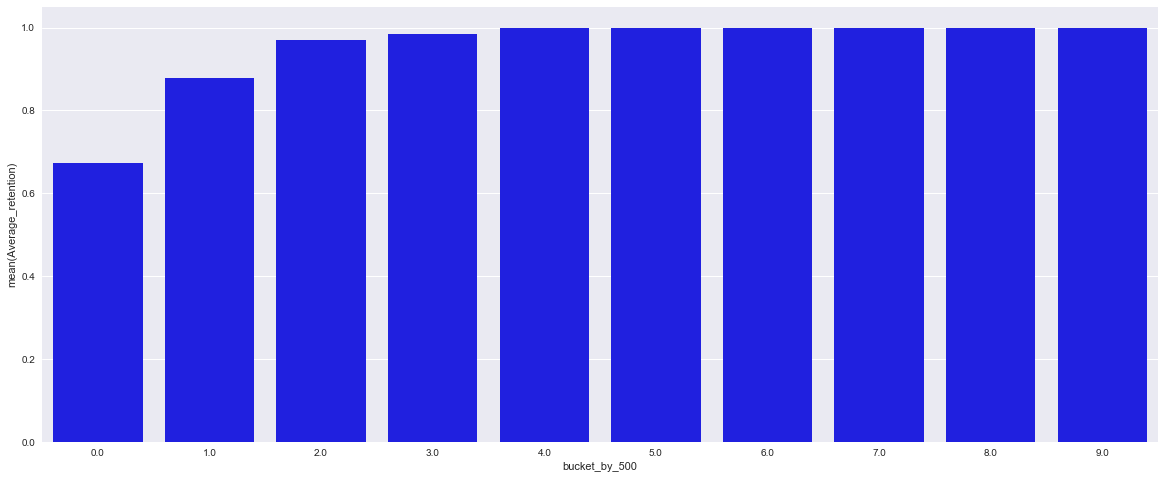

In [254]:


plt.figure(figsize=(20,8))
sns.barplot(x='bucket_by_500',y='Average_retention',data=churn_per_revenue_bucket,color='blue')
#plt.savefig('retention.png')

In [255]:
#plt.figure(figsize=(20,6))
#churn_per_revenue_bucket.plot(x='bucket_by_500',y='Average_retention', kind='bar')
#fig.savefig('retention.png')

# -----------------------------------------------------------------

# Driver Value

### First 28 day period

In [256]:
# 1ST Period of 28 days

drivers_value_first_28_period = rides_first_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': {'first_28_days_revenue_$':lambda x: x.sum(),'revenue_prime_time':lambda x: x[rides_first_28_period['ride_prime_time']>0].sum(),'revenue_no_prime_time':lambda x: x[rides_first_28_period['ride_prime_time']==0].sum()},
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            'ride_prime_time': lambda x: x[x>0].count().astype(float)/x.count(),
                                            'timestamp': lambda x: x.str.slice(start=0,stop=10).nunique(),
                                            #'total_revenue_$': lambda x: x[rides_first_28_period['ride_prime_time']>0].sum()
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                #'total_revenue_$':'first_28_days_revenue_$',
                                                                'timestamp': '#_active_days',
                                                                'ride_prime_time': '%_prime_time',
                                                                #'total_revenue_$': ['first_28_days_revenue_$', 'revenue_prime_time','revenue_no_prime_time']
                                                })
drivers_value_first_28_period.head()

driver_id  #_rides total_duration_seconds  \
                                    <lambda>               <lambda>   
0  002be0ffdc997bd5c50703158b7c2491      109                78271.0   
1  007f0389f9c7b03ef97098422f902e62        7                 5471.0   
2  011e5c5dfc5c2c92501b8b24d47509bc       12                 9929.0   
3  0152a2f305e71d26cc964f8d4411add9       56                46599.0   
4  01674381af7edd264113d4e6ed55ecda      176               165773.0   

          total_revenue_$                                           \
  first_28_days_revenue_$ revenue_prime_time revenue_no_prime_time   
0             1090.035053         474.501238            615.533816   
1               67.431463          39.043410             28.388053   
2              144.589610          68.121854             76.467756   
3              626.121248         164.694850            461.426399   
4             2045.983642         549.832929           1496.150713   

  driver_onboard_date total_distance_miles #_active_days %_prime_time  
             <lambda>             <lambda>      <lambda>     <lambda>  
0          2016-03-29           386.305108            21     0.376147  
1          2016-03-29            18.624974             3     0.428571  
2          2016-04-05            58.779211             5     0.416667  
3          2016-04-23           264.131763            15     0.214286  
4          2016-04-29           878.087322            20     0.261364

In [257]:
first_period_drivers_value = drivers_value_first_28_period['total_revenue_$'] 
first_period_drivers_value['driver_id'] = drivers_value_first_28_period['driver_id']

In [258]:
# Lyft commision on each ride is 25%
# If prime time, the value of a driver should increase -> 70% of 25%
# If no prime time, the value of a driver should increase -> 50% of 25%

first_period_drivers_value['Driver_value_if_prime_time_first_period'] =  0.7 * (first_period_drivers_value['revenue_prime_time']*0.25)
first_period_drivers_value['Driver_value_if_no_prime_time_first_period'] =  0.5 * (first_period_drivers_value['revenue_no_prime_time']*0.25)
first_period_drivers_value['Total_Driver_value_first_period'] =  first_period_drivers_value['Driver_value_if_no_prime_time_first_period'] + first_period_drivers_value['Driver_value_if_prime_time_first_period']
first_period_drivers_value.head()

,first_28_days_revenue_$,revenue_prime_time,revenue_no_prime_time,driver_id,Driver_value_if_prime_time_first_period,Driver_value_if_no_prime_time_first_period,Total_Driver_value_first_period
0,1090.035053,474.501238,615.533816,002be0ffdc997bd5c50703158b7c2491,83.037717,76.941727,159.979444
1,67.431463,39.043410,28.388053,007f0389f9c7b03ef97098422f902e62,6.832597,3.548507,10.381103
2,144.589610,68.121854,76.467756,011e5c5dfc5c2c92501b8b24d47509bc,11.921324,9.558470,21.479794
3,626.121248,164.694850,461.426399,0152a2f305e71d26cc964f8d4411add9,28.821599,57.678300,86.499899
4,2045.983642,549.832929,1496.150713,01674381af7edd264113d4e6ed55ecda,96.220763,187.018839,283.239602


### Second 28 day period

In [259]:
# Data from the second 28 day period

drivers_value_second_28_period = rides_second_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': {'second_28_days_revenue_$':lambda x: x.sum(),'revenue_prime_time':lambda x: x[rides_second_28_period['ride_prime_time']>0].sum(),'revenue_no_prime_time':lambda x: x[rides_second_28_period['ride_prime_time']==0].sum()},
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            'ride_prime_time': lambda x: x[x>0].count().astype(float)/x.count(),
                                            'timestamp': lambda x: x.str.slice(start=0,stop=10).nunique(),
                                            #'total_revenue_$': lambda x: x[rides_first_28_period['ride_prime_time']>0].sum()
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                #'total_revenue_$':'first_28_days_revenue_$',
                                                                'timestamp': '#_active_days',
                                                                'ride_prime_time': '%_prime_time',
                                                                #'total_revenue_$': ['first_28_days_revenue_$', 'revenue_prime_time','revenue_no_prime_time']
                                                })
drivers_value_second_28_period.head()

driver_id  #_rides total_duration_seconds  \
                                    <lambda>               <lambda>   
0  002be0ffdc997bd5c50703158b7c2491       42                34449.0   
1  007f0389f9c7b03ef97098422f902e62       15                10049.0   
2  011e5c5dfc5c2c92501b8b24d47509bc       17                16457.0   
3  0152a2f305e71d26cc964f8d4411add9       93                90484.0   
4  01674381af7edd264113d4e6ed55ecda      190               182815.0   

           total_revenue_$                                           \
  second_28_days_revenue_$ revenue_prime_time revenue_no_prime_time   
0               508.093372         364.848300            143.245072   
1               122.814027          45.262236             77.551791   
2               222.343912          96.207031            126.136881   
3              1086.718766         335.530148            751.188617   
4              2312.106739         648.273412           1663.833328   

  driver_onboard_date total_distance_miles #_active_days %_prime_time  
             <lambda>             <lambda>      <lambda>     <lambda>  
0          2016-03-29           166.278880            11     0.523810  
1          2016-03-29            39.226530             5     0.333333  
2          2016-04-05            94.615541             6     0.529412  
3          2016-04-23           465.414957            19     0.279570  
4          2016-04-29          1015.189105            19     0.247368

In [260]:
second_period_drivers_value = drivers_value_second_28_period['total_revenue_$'] 
second_period_drivers_value['driver_id'] = drivers_value_second_28_period['driver_id']

In [261]:
# Lyft commision on each ride is 25%
# If prime time, the value of a driver should increase -> 70% of 25%
# If no prime time, the value of a driver should increase -> 50% of 25%

second_period_drivers_value['Driver_value_if_prime_time_second_period'] =  0.7 * (second_period_drivers_value['revenue_prime_time']*0.25)
second_period_drivers_value['Driver_value_if_no_prime_time_second_period'] =  0.5 * (second_period_drivers_value['revenue_no_prime_time']*0.25)
second_period_drivers_value['Total_Driver_value_second_period'] =  second_period_drivers_value['Driver_value_if_no_prime_time_second_period'] + second_period_drivers_value['Driver_value_if_prime_time_second_period']
second_period_drivers_value.head()

,second_28_days_revenue_$,revenue_prime_time,revenue_no_prime_time,driver_id,Driver_value_if_prime_time_second_period,Driver_value_if_no_prime_time_second_period,Total_Driver_value_second_period
0,508.093372,364.848300,143.245072,002be0ffdc997bd5c50703158b7c2491,63.848452,17.905634,81.754086
1,122.814027,45.262236,77.551791,007f0389f9c7b03ef97098422f902e62,7.920891,9.693974,17.614865
2,222.343912,96.207031,126.136881,011e5c5dfc5c2c92501b8b24d47509bc,16.836230,15.767110,32.603341
3,1086.718766,335.530148,751.188617,0152a2f305e71d26cc964f8d4411add9,58.717776,93.898577,152.616353
4,2312.106739,648.273412,1663.833328,01674381af7edd264113d4e6ed55ecda,113.447847,207.979166,321.427013


In [284]:
# There are drivers who didn't complete any rides during the second 28 days period

total_value_per_driver= pd.merge(first_period_drivers_value.iloc[:,[3,6]],second_period_drivers_value.iloc[:,[3,6]],how='outer',on='driver_id')
total_value_per_driver['Total_Driver_value_second_period'].fillna(0,inplace=True)
total_value_per_driver.head()

,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period
0,002be0ffdc997bd5c50703158b7c2491,159.979444,81.754086
1,007f0389f9c7b03ef97098422f902e62,10.381103,17.614865
2,011e5c5dfc5c2c92501b8b24d47509bc,21.479794,32.603341
3,0152a2f305e71d26cc964f8d4411add9,86.499899,152.616353
4,01674381af7edd264113d4e6ed55ecda,283.239602,321.427013


In [285]:
total_value_per_driver['Average_value']=(total_value_per_driver['Total_Driver_value_first_period']+total_value_per_driver['Total_Driver_value_second_period'])/2

In [286]:
total_value_per_driver.head()

,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period,Average_value
0,002be0ffdc997bd5c50703158b7c2491,159.979444,81.754086,120.866765
1,007f0389f9c7b03ef97098422f902e62,10.381103,17.614865,13.997984
2,011e5c5dfc5c2c92501b8b24d47509bc,21.479794,32.603341,27.041567
3,0152a2f305e71d26cc964f8d4411add9,86.499899,152.616353,119.558126
4,01674381af7edd264113d4e6ed55ecda,283.239602,321.427013,302.333307


In [288]:
total_value_per_driver['Average_value'].describe()

count    646.000000
mean     142.034066
std      115.965311
min        0.570955
25%       33.979616
50%      124.404824
75%      221.003609
max      695.869646
Name: Average_value, dtype: float64

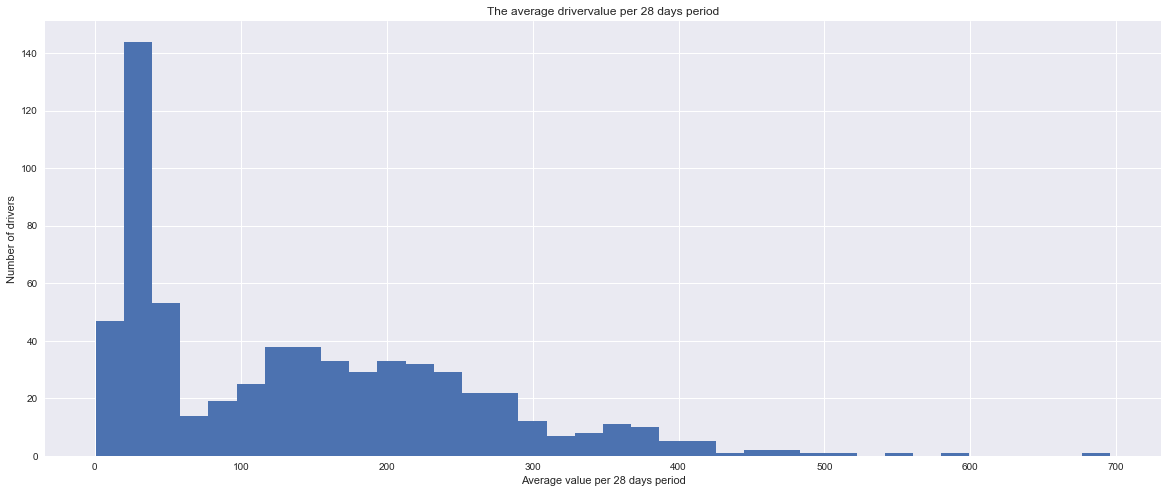

In [292]:
#ndrivers = len(drivers['driver_id'])
total_value_per_driver.hist(column='Average_value', bins=36, figsize=(20,8))
plt.xlabel("Average value per 28 days period")
plt.ylabel("Number of drivers")
plt.title("The average drivervalue per 28 days period")
plt.savefig('Average driver value per 28 days perdiod.png')
plt.show()

In [265]:
total_value_per_driver.to_pickle('/Users/Hedi/Documents/total_value_per_driver.pickle')

# -----------------------------------------------------------------------